### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import BatchNormalization
import cv2
from PIL import Image
import os

### Read the input images and put them into a numpy array

In [2]:


data=[]
labels=[]

height = 32
width = 32
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "C:\\Users\\rajat\\Desktop\\DL-project\\Train\\{0}\\".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

C:\Users\rajat\Desktop\DL-project\Train\0\
C:\Users\rajat\Desktop\DL-project\Train\1\
C:\Users\rajat\Desktop\DL-project\Train\2\
C:\Users\rajat\Desktop\DL-project\Train\3\
C:\Users\rajat\Desktop\DL-project\Train\4\
C:\Users\rajat\Desktop\DL-project\Train\5\
C:\Users\rajat\Desktop\DL-project\Train\6\
C:\Users\rajat\Desktop\DL-project\Train\7\
C:\Users\rajat\Desktop\DL-project\Train\8\
C:\Users\rajat\Desktop\DL-project\Train\9\
C:\Users\rajat\Desktop\DL-project\Train\10\
C:\Users\rajat\Desktop\DL-project\Train\11\
C:\Users\rajat\Desktop\DL-project\Train\12\
C:\Users\rajat\Desktop\DL-project\Train\13\
C:\Users\rajat\Desktop\DL-project\Train\14\
C:\Users\rajat\Desktop\DL-project\Train\15\
C:\Users\rajat\Desktop\DL-project\Train\16\
C:\Users\rajat\Desktop\DL-project\Train\17\
C:\Users\rajat\Desktop\DL-project\Train\18\
C:\Users\rajat\Desktop\DL-project\Train\19\
C:\Users\rajat\Desktop\DL-project\Train\20\
C:\Users\rajat\Desktop\DL-project\Train\21\
C:\Users\rajat\Desktop\DL-project\Train\22

### Splitting the images into train and validation sets

In [3]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hot encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

### Load Pre-trained Model 

In [4]:
from keras.applications import VGG19

vgg_conv = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg_conv.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

### Build Model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.summary()

### Compilation of the model


In [6]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

### Fit model

In [7]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))


Epoch 1/10
981/981 [==============================] - 1900s 2s/step - loss: 2.6246 - accuracy: 0.1908 - val_loss: 3.3789 - val_accuracy: 0.1310
Epoch 2/10
981/981 [==============================] - 1909s 2s/step - loss: 1.3983 - accuracy: 0.5250 - val_loss: 0.9967 - val_accuracy: 0.6639
Epoch 3/10
981/981 [==============================] - 1916s 2s/step - loss: 0.8108 - accuracy: 0.7173 - val_loss: 0.8098 - val_accuracy: 0.6971
Epoch 4/10
981/981 [==============================] - 2043s 2s/step - loss: 0.5644 - accuracy: 0.8050 - val_loss: 0.3272 - val_accuracy: 0.8913
Epoch 5/10
981/981 [==============================] - 5167s 5s/step - loss: 0.4462 - accuracy: 0.8480 - val_loss: 0.3438 - val_accuracy: 0.8741
Epoch 6/10
981/981 [==============================] - 1809s 2s/step - loss: 0.3257 - accuracy: 0.8906 - val_loss: 0.2556 - val_accuracy: 0.9219
Epoch 7/10
981/981 [==============================] - 5240s 5s/step - loss: 0.2826 - accuracy: 0.9057 - val_loss: 0.1627 - val_accuracy:

### Plot Graph

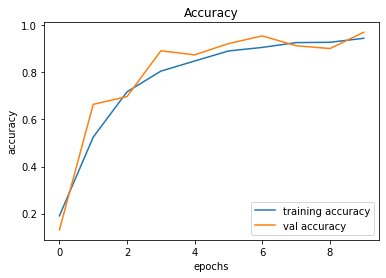

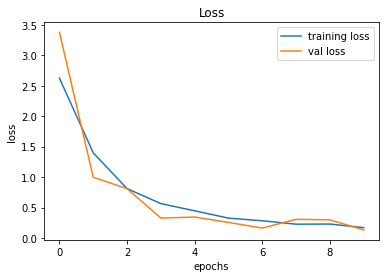

In [8]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Prediction on Test Data

In [9]:
y_test=pd.read_csv("C:\\Users\\rajat\\Desktop\\DL-project\\Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('C:\\Users\\rajat\\Desktop\\DL-project\\'+f.replace('Test\\', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### Accuracy with the test data

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9164687252573238

### Save Model

In [13]:
model.save("TSR_vgg.h5")


### Load Model

In [10]:
from keras.models import load_model
model = load_model("TSR_vgg.h5")

### Classes of traffic signs

In [11]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### To test on test images

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

### Predictions

Predicted traffic sign is:  Wild animals crossing


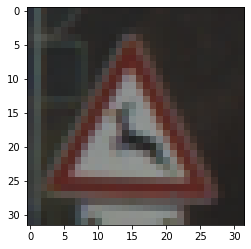

In [13]:
plot,prediction = test_on_img("C:\\Users\\rajat\\Desktop\\DL-project\\Test\\00522.png")
s = [str(i) for i in prediction] 
a = 0
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  No passing


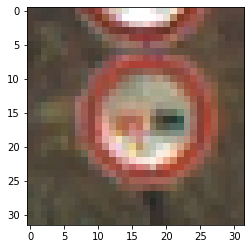

In [14]:
plot,prediction = test_on_img("C:\\Users\\rajat\\Desktop\\DL-project\\Test\\00389.png")
s = [str(i) for i in prediction] 
a = 0
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Slippery road


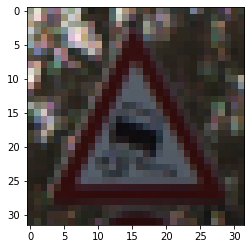

In [15]:
plot,prediction = test_on_img("C:\\Users\\rajat\\Desktop\\DL-project\\Test\\00569.png")
s = [str(i) for i in prediction] 
a = 0
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()